In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
filename = "data/data_761.csv"

df = pd.read_csv(filename)
df

,Unnamed: 0,A,B,C,D
0,0,0.387472,-0.165719,0.159720,0.553191
1,1,2.200931,0.057570,1.044658,2.143362
2,2,0.592625,-0.213249,0.729121,0.805873
3,3,5.590732,-0.286676,2.680387,5.877409
4,4,0.322272,-0.153596,-0.386535,1.475868
...,...,...,...,...,...
95,95,0.964045,0.168651,-0.583882,0.795394
96,96,0.770550,-0.296496,-1.702878,1.067046
97,97,-0.564637,1.408363,-0.253048,-1.973000
98,98,0.889175,0.724945,0.000812,0.164230


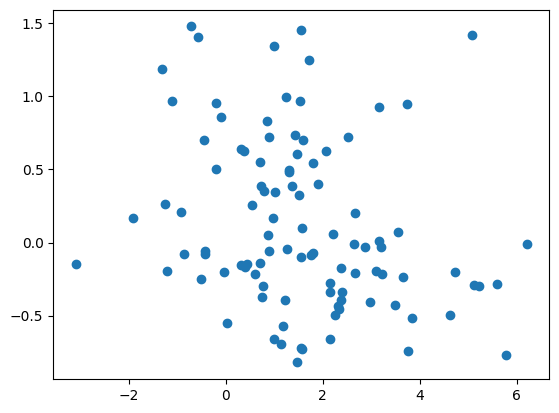

In [13]:

plt.scatter(df["A"], df["B"])
